# Using callbacks

- Model checkpointing—Saving the current state of the model at different points during training.
-  Early stopping—Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
-  Dynamically adjusting the value of certain parameters during training—Such as the learning rate of the optimizer.
- Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated

## THE EarlyStopping AND ModelCheckpoint. CALLBACKS

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [5]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(len(train_images), 28*28)/255 
test_images = test_images.reshape(len(test_images), 28*28)/255 
val_images, train_images = train_images[:10000], train_images[10000:]
val_labels, train_labels = train_labels[:10000], train_labels[10000:]

In [10]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2), # stop if no improvement
                  keras.callbacks.ModelCheckpoint(filepath='checkpoint_path', monitor='val_loss', save_best_only=True) # save after epoch
]

In [13]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2965 - accuracy: 0.9121 - val_loss: 0.1507 - val_accuracy: 0.9566
INFO:tensorflow:Assets written to: checkpoint_path\assets
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1672 - accuracy: 0.9529 - val_loss: 0.1220 - val_accuracy: 0.9672
INFO:tensorflow:Assets written to: checkpoint_path\assets
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1369 - accuracy: 0.9630 - val_loss: 0.1092 - val_accuracy: 0.9722
INFO:tensorflow:Assets written to: checkpoint_path\assets
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1233 - accuracy: 0.9675 - val_loss: 0.1122 - val_accuracy: 0.9733
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1154 - accuracy: 0.9706 - val_loss: 0.1110 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1098 - accuracy: 0.9726 - va

In [ ]:
'''
User defined callbacks from class keras.callbacks.Callback

on_epoch_begin(epoch, logs)
on_epoch_end(epoch, logs)
on_batch_begin(batch, logs)
on_batch_end(batch, logs)
on_train_begin(logs)
on_train_end(logs)

'''

In [15]:
import matplotlib.pyplot as plt

class LossHoistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
        
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        #plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2967 - accuracy: 0.9107 - val_loss: 0.1528 - val_accuracy: 0.9556
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1641 - accuracy: 0.9539 - val_loss: 0.1292 - val_accuracy: 0.9641
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1408 - accuracy: 0.9625 - val_loss: 0.1105 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1248 - accuracy: 0.9673 - val_loss: 0.1133 - val_accuracy: 0.9719
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1152 - accuracy: 0.9704 - val_loss: 0.1078 - val_accuracy: 0.9745
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1082 - accuracy: 0.9727 - val_loss: 0.1052 - val_accuracy: 0.9758
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1037 - accuracy: 0.9751 - val_loss: 0.1038 - val_accuracy:

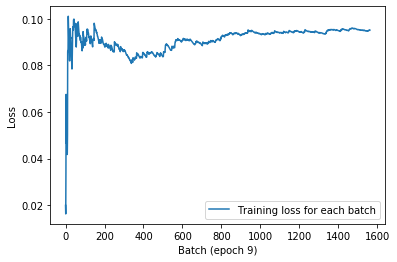

In [16]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHoistory()],
          validation_data=(val_images, val_labels))

## Tensorboard

In [18]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = keras.callbacks.TensorBoard('tensorboard_log_dir')

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2931 - accuracy: 0.9130 - val_loss: 0.1592 - val_accuracy: 0.9555
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1661 - accuracy: 0.9529 - val_loss: 0.1288 - val_accuracy: 0.9667
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1392 - accuracy: 0.9626 - val_loss: 0.1142 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1256 - accuracy: 0.9675 - val_loss: 0.1155 - val_accuracy: 0.9744
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1133 - accuracy: 0.9715 - val_loss: 0.1124 - val_accuracy: 0.9749
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1114 - accuracy: 0.9732 - val_loss: 0.1142 - val_accuracy: 0.9768
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1080 - accuracy: 0.9747 - val_loss: 0.1119 - val_accurac